<a href="https://colab.research.google.com/github/coa-project/coabook/blob/master/test_GeoManager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://nbviewer.jupyter.org/github/coa-project/coabook/blob/master/test_GeoManager.ipynb" target="_parent" ><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" height="25"  alt="View in Jupyter nbviewwer" align="middle" /></a>

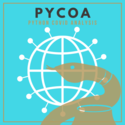

# Testing pycoa.geo.GeoManager
[ⓒpycoa.fr](https://pycoa.fr)

This notebook is designed for the v2.0 version of pycoa.

Within the coa.geo, the GeoManager provides method to manage the name translation and standardization, needed to join various databases.

## Making  PyCoA available

In [1]:
!pip install --quiet git+https://github.com/coa-project/pycoa.git@v2.0
# !pip install --quiet --user git+https://github.com/coa-project/pycoa.git@v2.0   # One may need to add the --user option at the "pip install" command, if it fails due to privilege lack. Under google colab, you must not add this option.

     |████████████████████████████████| 163kB 7.9MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 102kB 5.5MB/s 
     |████████████████████████████████| 972kB 10.0MB/s 
     |████████████████████████████████| 10.1MB 25.5MB/s 
     |████████████████████████████████| 286kB 48.8MB/s 
     |████████████████████████████████| 245kB 53.4MB/s 
     |████████████████████████████████| 6.5MB 52.6MB/s 
     |████████████████████████████████| 14.8MB 278kB/s 
     |████████████████████████████████| 245kB 59.5MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.12.1 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.4 which is incompatible.


If `pycoa` is already installed on your system but is not in your path, you should specfiy it with the next lines (with the correct path); then please uncomment the second line.

In [2]:
# import sys    # adapt the path for local install, if necessary. Under google colab, do not change anything
# sys.path.insert(1, '../pycoa')   

In [3]:
# testing the correct install of pycoa
import importlib
coa_module_info = importlib.util.find_spec("coa")
if coa_module_info == None:
  raise ModuleNotFoundError("The coa module is not found. Please check your install")

import coa
if coa.__version__ != 'v2.0':
  raise ImportError("The pycoa package version is incorrect. Expecting v2.0")

In [4]:
from coa.geo import GeoManager as gm

## Getting some help

In [5]:
help(gm)

Help on class GeoManager in module coa.geo:

class GeoManager(builtins.object)
 |  GeoManager class definition. No inheritance from any other class.
 |  
 |  It should raise only CoaError and derived exceptions in case
 |  of errors (see pycoa.error)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, standard='iso2')
 |      __init__ member function, with default definition of
 |      the used standard. To get the current default standard,
 |      see get_list_standard()[0].
 |  
 |  first_db_translation(self, w, db)
 |      This function helps to translate from country name to
 |      standard for specific databases. It's the first step
 |      before final translation.
 |      
 |      One can easily add some database support adding some new rules
 |      for specific databases
 |  
 |  get_GeoRegion(self)
 |      return the GeoRegion local instance
 |  
 |  get_list_db(self)
 |      return supported list of database name for translation of
 |      country names to standard.
 |  

## Usage

In [6]:
g=gm() # Create the instance of GeoManager 

### Suppported options

In [7]:
g.get_list_db() # list of databases for which there is a translation support. First one is default.

[None, 'jhu', 'worldometers', 'owid']

In [8]:
g.get_list_output() 

['list', 'dict', 'pandas']

In [9]:
g.get_list_standard() # get the list of supported standards. First one is default

['iso2', 'iso3', 'name', 'num']

In [10]:
g.get_standard() # get the current output standard

'iso2'

### Changing the default output standard

In [11]:
g.set_standard('name')

'name'

In [12]:
g2=gm('iso3')
g2.get_standard()

'iso3'

### Converting countries to standardized names

In [13]:
g.to_standard('england') # single country

['United Kingdom']

In [14]:
g.to_standard(['esp','it']) # list of countries

['Spain', 'Italy']

In [15]:
from coa.error import * 
try:
    z=g.to_standard('European Union') # the name does not exist as a country
except CoaError:
    print('The input name is unknown, try to interpret as a region')
    z=g.to_standard('European Union',interpret_region=True) # but exists as a region
print(z)

The input name is unknown, try to interpret as a region
['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Sweden']


In [16]:
g.to_standard(['usa','South America','russia'],interpret_region=True) # mix between region and countries

['United States',
 'Argentina',
 'Bolivia, Plurinational State of',
 'Brazil',
 'Bouvet Island',
 'Chile',
 'Colombia',
 'Ecuador',
 'Falkland Islands (Malvinas)',
 'French Guiana',
 'Guyana',
 'Peru',
 'Paraguay',
 'South Georgia and the South Sandwich Islands',
 'Suriname',
 'Uruguay',
 'Venezuela, Bolivarian Republic of',
 'Russian Federation']

In [17]:
g.to_standard('french') # difficult interpretation, getting first item, a warning appears

/usr/local/lib/python3.6/dist-packages/coa/geo.py:198: UserWarning: Caution. More than one country match the key "French" : ['France, ', 'French Guiana, ', 'French Polynesia, ', 'French Southern Territories, ', 'Saint Martin (French part), '], using first one.

  ', using first one.\n')


['France']

### Conversion for specific databases

In [18]:
try:
    z=g.to_standard('Congo (Kinshasa)')
except CoaError:
    print('Try to interpret within the JHU database country name usage')
    z=g.to_standard('Congo (Kinshasa)',db='jhu')
z

Try to interpret within the JHU database country name usage


['Congo, The Democratic Republic of the']

### Other outputs

In [19]:
g.to_standard(['fr','spain','england'],output='dict')

{'England': 'United Kingdom', 'Fr': 'France', 'Spain': 'Spain'}

In [20]:
g.to_standard(['fr','spain','england'],output='pandas')

,inputname,name
0,Fr,France
1,Spain,Spain
2,England,United Kingdom


## Management of errors

As far as possible, errors are managed within the `cocoa.error` framework. `CocoaError` should be raised.

In [21]:
g.set_standard('oups') # the standard is not in the standard list 

CoaKeyError: ignored

In [22]:
g3=gm('hi!') # idem

CoaKeyError: ignored

In [23]:
g.to_standard('Congo (Kinshasa)',db='another base') # unknown base

CoaDbError: ignored

In [24]:
g.to_standard('aus',output='another output') # bad output type

CoaKeyError: ignored

In [25]:
g.to_standard('Europe',interpret_region=1) # bad type (boolean required) for interpret_region option

CoaTypeError: ignored

In [26]:
g.to_standard('elsewhere') # unknown country

CoaLookupError: ignored

In [27]:
g.to_standard('European Union',output='dict',interpret_region=True) # cannont create dict or pandas output with interpret_region=True

CoaKeyError: ignored